## Random Forest Regressor for molecules solubility

#### Read data

In [1]:
import pandas as pd
import numpy as np


# Reading csv
sol_df = pd.read_csv("data/delaney-processed.csv")
sol_df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


#### Trying Random Forest Regressor from scikit-learn

R^2: 0.8254
RMSE: 0.9084


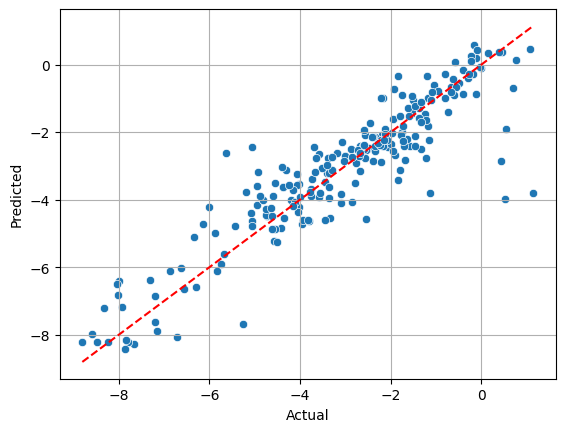

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from src.utils import show_accuracy


rel_features = [
    "Molecular Weight",
    "Minimum Degree",
    "Number of H-Bond Donors",
    "Number of Rings",
    "Number of Rotatable Bonds",
    "Polar Surface Area",
]
target = "measured log solubility in mols per litre"

# Train-test splitting
X = sol_df[rel_features]
y = sol_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate
show_accuracy(y_test=y_test, y_pred=y_pred)

#### Trying Random Forest Regressor with feature engineering

R^2: 0.8697
RMSE: 0.7848


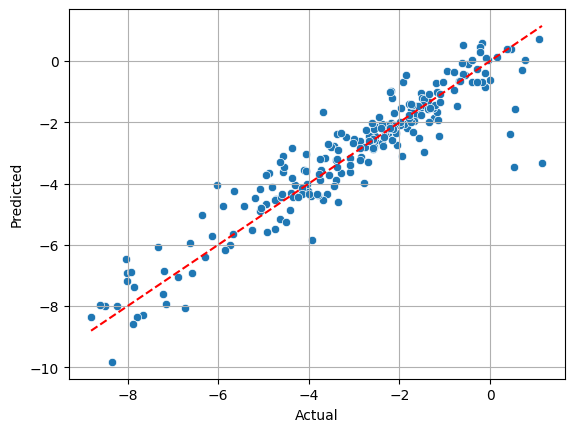

In [ ]:
from rdkit.Chem import Descriptors
from rdkit import Chem

from src.utils import show_accuracy

# First create the molecule object for each entry
sol_df["rdkit_mol"] = sol_df["smiles"].apply(Chem.MolFromSmiles)

# Then use that to extract other features with RDkit
sol_df["MolLogP"] = sol_df["rdkit_mol"].apply(Descriptors.MolLogP)
sol_df["MolMR"] = sol_df["rdkit_mol"].apply(Descriptors.MolMR)
sol_df["HeavyAtomCount"] = sol_df["rdkit_mol"].apply(Descriptors.HeavyAtomCount)
sol_df["FractionCSP3"] = sol_df["rdkit_mol"].apply(Descriptors.FractionCSP3)
sol_df["TPSA"] = sol_df["rdkit_mol"].apply(Descriptors.TPSA)
sol_df["NumAromaticRings"] = sol_df["rdkit_mol"].apply(Descriptors.NumAromaticRings)
sol_df["NumHDonors"] = sol_df["rdkit_mol"].apply(Descriptors.NumHDonors)
sol_df["NumHAcceptors"] = sol_df["rdkit_mol"].apply(Descriptors.NumHAcceptors)

rel_features = [
    "Molecular Weight",
    "Minimum Degree",
    "Number of H-Bond Donors",
    "Number of Rings",
    "Number of Rotatable Bonds",
    "Polar Surface Area",
    "MolLogP",
    "MolMR",
    "HeavyAtomCount",
    "FractionCSP3",
    "TPSA",
    "NumAromaticRings",
    "NumHDonors",
    "NumHAcceptors",
]
target = "measured log solubility in mols per litre"

# Train-test splitting
X = sol_df[rel_features]
y = sol_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate
show_accuracy(y_test=y_test, y_pred=y_pred)

#### We can now try an XGBoost!

R^2: 0.8787
RMSE: 0.7572


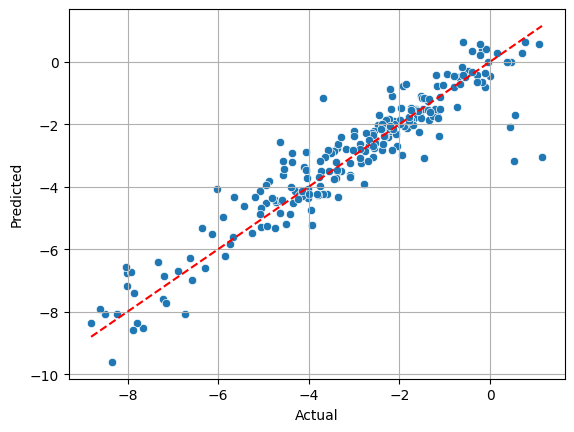

In [4]:
from rdkit.Chem import Descriptors
from rdkit import Chem
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from src.utils import show_accuracy


# First create the molecule object for each entry
sol_df["rdkit_mol"] = sol_df["smiles"].apply(Chem.MolFromSmiles)

# Then use that to extract other features with RDkit
sol_df["MolLogP"] = sol_df["rdkit_mol"].apply(Descriptors.MolLogP)
sol_df["MolMR"] = sol_df["rdkit_mol"].apply(Descriptors.MolMR)
sol_df["HeavyAtomCount"] = sol_df["rdkit_mol"].apply(Descriptors.HeavyAtomCount)
sol_df["FractionCSP3"] = sol_df["rdkit_mol"].apply(Descriptors.FractionCSP3)
sol_df["TPSA"] = sol_df["rdkit_mol"].apply(Descriptors.TPSA)
sol_df["NumAromaticRings"] = sol_df["rdkit_mol"].apply(Descriptors.NumAromaticRings)
sol_df["NumHDonors"] = sol_df["rdkit_mol"].apply(Descriptors.NumHDonors)
sol_df["NumHAcceptors"] = sol_df["rdkit_mol"].apply(Descriptors.NumHAcceptors)

rel_features = [
    "Molecular Weight",
    "Minimum Degree",
    "Number of H-Bond Donors",
    "Number of Rings",
    "Number of Rotatable Bonds",
    "Polar Surface Area",
    "MolLogP",
    "MolMR",
    "HeavyAtomCount",
    "FractionCSP3",
    "TPSA",
    "NumAromaticRings",
    "NumHDonors",
    "NumHAcceptors",
]
target = "measured log solubility in mols per litre"

# Train-test splitting
X = sol_df[rel_features]
y = sol_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# Evaluate
show_accuracy(y_test=y_test, y_pred=y_pred)

#### Tuning hyperparameters for an optimized XGBoost

In [5]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.3],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]
}

xgb = XGBRegressor(random_state=42)
search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, cv=3, scoring="r2", n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)


Best parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


R^2: 0.8794
RMSE: 0.7549


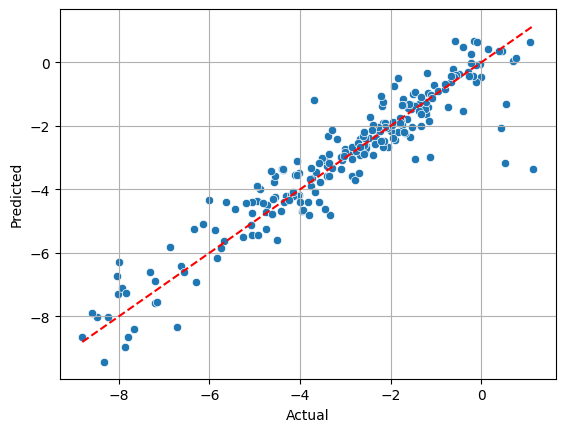

In [7]:
# Use best parameters from RandomizedSearchCV
best_xgb = XGBRegressor(**search.best_params_)

# Train
best_xgb.fit(X_train, y_train)

# Predict
y_pred = best_xgb.predict(X_test)

# Evaluate
show_accuracy(y_test=y_test, y_pred=y_pred)